In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<a href="javascript:code_toggle()">Toggle Code</a>.''')

In [2]:
#IMPORTS
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact
from IPython.display import display
import copy

In [3]:
#LOAD DATA - MONGO VARIANT
import load_samples as ls

#labels = ['curve_s','curve_m','curve_l','straight','wall','object']
labels = ['curve_m_l','curve_m_r','straight','wall','object']
label_index = []
dataset = []

for label in labels:
    samples = ls.load_sample(labels = label, sample_id=1337)
    samples = ls.convert_to_input(samples, accel='', gyro='y', compass='')
    dataset.extend(ls.flatten(samples))    
    label_index.append(len(dataset))

In [4]:
#TRUNCATE INFO
dataset_org = copy.deepcopy(dataset)
cur_index = 0
trunc_index = []
for data in dataset:
    trunc_index.append({'x': 0,'y': len(data)-1})

In [5]:
#WIDGET INIT

btnOk = widgets.Button(description='Truncate')
def truncate(b):
    x = trunc_index[cur_index]['x']
    y = trunc_index[cur_index]['y']+1
    data = dataset[cur_index]
    del data[y:]
    del data[:x]
    trunc_index[cur_index] = {'x': 0, 'y': len(data)-1}
    set_data(cur_index)
btnOk.on_click(truncate)

btnReset = widgets.Button(description='Reset')
def reset(b):
    dataset[cur_index] = copy.copy(dataset_org[cur_index])
    trunc_index[cur_index] = {'x': 0, 'y': len(dataset[cur_index])-1}
    set_data(cur_index)
btnReset.on_click(reset)

btnSave = widgets.Button(description='Save')
def save(b):
    #todo
    file = open(filename+'_trunc.csv', 'w'+bt)
    writer = csv.writer(file)
    for data in dataset:
        writer.writerow(data)
    print('Saved!')
btnSave.on_click(save)

trunc_sl = widgets.IntRangeSlider(value=[0,1], min=0, max=trunc_index[cur_index]['y'])
def update_trunc(change):
    x = change['new'][0]
    y = change['new'][1]
    trunc_index[cur_index] = {'x': x, 'y': y}
    draw_data_cutter()
trunc_sl.observe(update_trunc, names='value')

txtIndex = widgets.Text(value=str(cur_index))
def update_index(sender):
    try:
        index = int(txtIndex.value)
        set_data(index)
    except ValueError:
        txtIndex.value = str(cur_index)
txtIndex.on_submit(update_index)

txtLabel = widgets.Text(value=labels[0],disabled=True)
def get_label(index):
    for i in range(len(label_index)):
        if label_index[i] > index:
            return labels[i]
    return '???'
    
btnPrev = widgets.Button(description='Prev')
def prev_data(b):
    global cur_index
    cur_index -= 1
    if(cur_index < 0): cur_index = 0
    else: set_data(cur_index)
btnPrev.on_click(prev_data)
btnNext = widgets.Button(description='Next')
def next_data(b):
    global cur_index
    cur_index += 1
    if(cur_index >= len(dataset)): cur_index = len(dataset)-1
    else: set_data(cur_index)
btnNext.on_click(next_data)

def set_data(index):
    global cur_index 
    cur_index = index
    txtIndex.value = str(index)
    txtLabel.value = get_label(index)
    x = trunc_index[index]['x']
    y = trunc_index[index]['y']
    trunc_sl.max = len(dataset[index])-1
    trunc_sl.value = [x,y]
    draw_data_cutter()

<IPython.core.display.Javascript object>


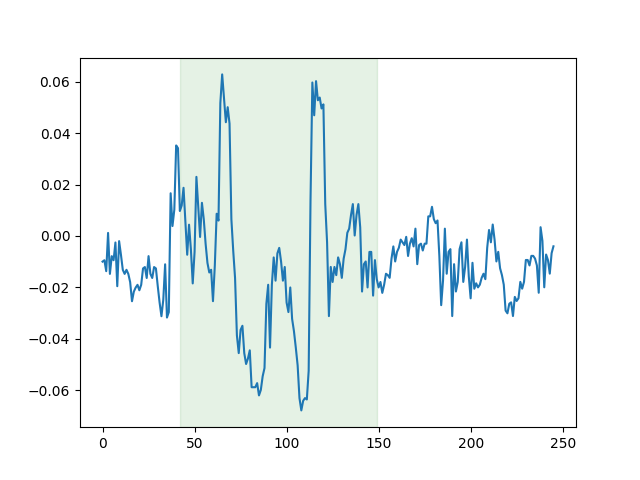

In [6]:
#PLOT
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()

def draw_data_cutter():
    x = trunc_index[cur_index]['x']
    y = trunc_index[cur_index]['y']
    ax.clear()
    ax.plot(range(len(dataset[cur_index])),dataset[cur_index])
    ax.axvspan(x, y, color='green', alpha=0.1)
    fig.canvas.draw()

display(widgets.HBox((btnOk,btnReset,btnSave)))
display(widgets.HBox((btnPrev,btnNext,txtIndex,txtLabel)))
display(trunc_sl)
set_data(cur_index)